In [ ]:
from ipyleaflet import Map, Marker, Polygon, basemaps

In [ ]:
center = (52.204793, 360.121558)

m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=10)

marker = Marker(location=center, draggable=True)
m.add(marker);

display(m)

In [ ]:
from netCDF4 import Dataset, num2date

In [ ]:
import numpy as np
import xarray as xr
import xradar as xd

In [ ]:
# f1 = Dataset("/Users/brenda/data/mdv/mrms_3d/20150626/20150626_230012.mdv.nc")

In [ ]:
# read dataset
ds = xr.open_dataset("/Users/brenda/data/mdv/mrms_3d/20150626/20150626_230012.mdv.nc")
# df = local_dataset.to_dataframe()  # convert to dataframe
display(ds)

In [ ]:
ds.x0[0]
xy = np.meshgrid(ds.x0, ds.y0)
xy

In [ ]:
ds.DBZ[0,0,:,:].plot()
# uses very basic matplotlib plot operation. 

In [ ]:
dbz = ds.DBZ
# dbz = df["DBZ"]

#dbz.index

#dbz2 = local_dataset["DBZ"]
#display(dbz)
# (time, z0, y0, x0)
dbzt0z0 = dbz[0,0,:,:]
dbz_xy = np.squeeze(dbzt0z0).shape
display(dbz_xy)
#dbznp = dbzt0z0.tolist()

#display(dbznp[3017524])
#dbz[1,1]

# lats = f1.variables["y0"][:]
# lons = f1.variables["x0"][:]
# time = f1.variables["time"]

In [ ]:
#                      (time, z0, y0, x0)
time_i = 0
z0_i = 0
y0_i = 0
dbz = np.array(np.squeeze(ds.DBZ[time_i,z0_i,:,:])).reshape(-1)
#dbz = np.squeeze(ds.DBZ[time_i,z0_i,0:1505:500,0:2004:80])
#dbz_sample = dbz * -1/10 # [0:5, 0:5]  dbz has two dimensions: x0, y0!!! try .to_stacked_array 
#type(dbz_sample.to_numpy().tolist())
#dbz_sample.to_numpy().tolist()
len(dbz)

In [ ]:
a = np.array((1,2,3))
b = np.array((82,83,84))
np.column_stack((a,b)).tolist()
av = np.array(np.meshgrid(a,b)).T.reshape(-1,2)
av
# the grid is rectangular (x0 and y0 have different lengths
#x0y0 = np.column_stack((ds.x0,ds.y0)).tolist()  

t = ((11,21),(12,22),(13,23))
type(t)

g = np.random.uniform(-80, 80, (n, 2))
type(g)
np.column_stack((g,b)).tolist()
# print(dbz[110,50].values)
#somedata = np.random.uniform(-80, 80, (25, 2))
#display(somedata)

In [ ]:
n = 3
h = np.random.uniform(-80, 80, (n, 2))
h
#np.column_stack( h, [0,1,3])

In [ ]:
bx = [0, 2, 4, 6]
by = [0,-2,-4,-6]
yx = np.array(np.meshgrid(by, bx)).T.reshape(-1,2)
yx

In [ ]:
#a = np.array((1,2,3))
#b = np.array((82,83,84))
#np.column_stack((a,b)).tolist()

av = np.array(np.meshgrid(ds.y0,ds.x0)).T.reshape(-1,2)
av_sample = av   # [0:1000:40]  
av_sample
#av_sample.tolist()
#av.size
#ds.x0.size * ds.y0.size
# the grid is rectangular (x0 and y0 have different lengths
#x0y0 = np.column_stack((ds.x0,ds.y0)).tolist()  

In [ ]:
class MdvMap:
    def __init__(self, points, values, radius=20):
        self.points = points
        self.values = values
        self.radius = radius

    @property
    def data(self):
        return np.column_stack((self.points, self.values))

    def as_leaflet_layer(self):
        from ipyleaflet import Heatmap
        return Heatmap(
            locations=self.data.tolist(),
            radius=self.radius, blur=0, gradient={0.4: "blue", 0.6: "cyan", 0.7: "lime", 0.8: "yellow", 1.0: "red"}
        )

In [ ]:
b.size

In [ ]:
from ipyleaflet import Map, ZoomControl

#n = 1000
#data = MdvMap(
#    np.random.uniform(-80, 80, (n, 2)), # generates 1000 * 2 points (i.e. 1000 x,y coordinates)
#    np.random.uniform(0, 1000, n),
#)
#data = MdvMap(av, dbz)
zoom_range = 12
zoom_level = 2
radius = zoom_level
npoints = 100
ncoords = len(av_sample)
ndata = len(dbz)
data_sample_scale = (zoom_range + 1 - zoom_level) / zoom_range
nsamples = ncoords / 3
everyn = int( ncoords / nsamples )
everyn

#subset = av_sample[0:ncoords:5] # everyn]
#subset
#zoom_level / zoom_range

data = MdvMap(av_sample[0:ncoords:everyn], dbz[0:ndata:everyn], radius)

my_zoom_control = ZoomControl(position='topright')

# ipywidgets is powered by traitlets, this brings an observer pattern implementation 
# which allows you to react on widget attribute changes.

#def on_location_changed(event):
#    # Do some computation given the new marker location, accessible from `event['new']`
#    pass
# marker.observe(on_location_changed, 'location')
caption = widgets.Label(value='The slider value is in its initial position.')
def on_zoom_level_changed(event):
    # Adjust the radius and the sample spacing; get zoom level from event['new']
    caption.value = 'The zoom level is ' + event.new
    pass

#caption = widgets.Label(value='The slider value is in its initial position.')
#slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

#def handle_slider_change(change):
#    caption.value = 'The slider value is ' + (
#        'negative' if change.new < 0 else 'nonnegative'
#    )

#slider.observe(handle_slider_change, names='value')
#display(caption, slider)
 

# my_zoom_control.observe(on_zoom_level_changed, names='zoom')
#display(caption, my_zoom_control)
m = Map(center=(35, -92), zoom=zoom_level, zoom_control=False)
m.add(my_zoom_control)
m.add(data)
m


In [ ]:
import ipywidgets as widgets
from ipyleaflet import ZoomControl
# print(widgets.Widget.observe.__doc__)
print(ZoomControl.observe.__doc__)


caption = widgets.Label(value='The slider value is in its initial position.')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

TypeError: Dimensions of C (1505, 2005) should be one smaller than X(1505) and Y(2005) while using shading='flat' see help(pcolormesh)

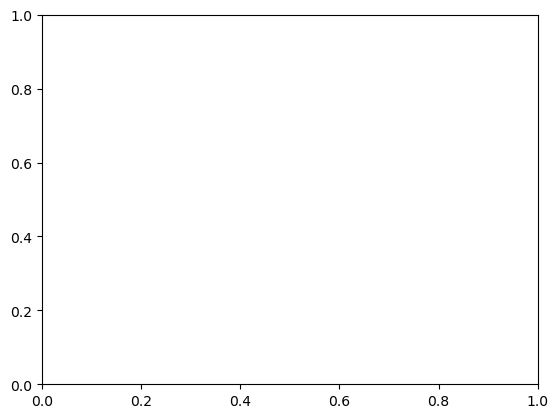

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# generate the image, i.e. plot
x = dbz[:,0]
y = dbz[0,:]
im = ax.pcolormesh(dbz[:,0], dbz[0,:], dbz)
# add a color bar
fig.colorbar(im, ax=ax)

In [7]:
dates = num2date(time[:], time.units)
time_of_day = dates[0].strftime("%Y-%m-%d %H:%M:%S")
print(time_of_day)

2015-06-26 23:00:12


In [22]:
dbz = f1.variables["DBZ"]
dbz_dimensions = f1.variables["DBZ"].dimensions
print(dbz_dimensions)
print(dbz[0,18,10,10])
type(dbz)
print(f1.variables.keys())
print(dbz)
print(len(lats), len(lons))

('time', 'z0', 'y0', 'x0')
-99.00217
dict_keys(['time', 'forecast_reference_time', 'forecast_period', 'start_time', 'stop_time', 'x0', 'y0', 'z0', 'grid_mapping_0', 'mdv_master_header', 'DBZ'])
<class 'netCDF4._netCDF4.Variable'>
int16 DBZ(time, z0, y0, x0)
    scale_factor: 0.016244275
    add_offset: -467.0487
    valid_min: -32767
    valid_max: 32767
    _FillValue: -32768
    standard_name: DBZ
    long_name: All Radar 3D Reflectivty Mosaic
    units: dBZ
    mdv_field_code: 1
    mdv_user_time_1: 0
    mdv_user_time_2: 0
    mdv_user_time_3: 0
    mdv_user_time_4: 0
    mdv_user_data_si32_0: 0
    mdv_user_data_si32_1: 0
    mdv_user_data_si32_2: 0
    mdv_user_data_si32_3: 0
    mdv_user_data_si32_4: 0
    mdv_user_data_si32_5: 0
    mdv_user_data_si32_6: 0
    mdv_user_data_si32_7: 0
    mdv_user_data_si32_8: 0
    mdv_user_data_si32_9: 0
    mdv_user_data_fl32_0: 0.0
    mdv_user_data_fl32_1: 0.0
    mdv_user_data_fl32_2: 0.0
    mdv_user_data_fl32_3: 0.0
    mdv_proj_type: 0


In [11]:
print(lats[0], lons[0])

29.984999 -110.015015


In [29]:
center = (lats[0], lons[0])



m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=10)

marker = Marker(location=center, draggable=True)
m.add(marker);

polysize_x = abs(lats[15] - lats[14]) / 0.5
polysize_y = abs(lons[15] - lons[14]) / 0.5
for ix in range(10, 30, 3):
    for iy in range(10,30, 3):
        x = lats[ix]
        y = lons[iy]
        polygon = Polygon(
            locations=[(x, y), (x+polysize_x, y), (x, y-polysize_y)],
            color="green",
            fill_color="green"
        )
        m.add(polygon);

# color scale using a choropleth layer?
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add(layer)


display(m)

Map(center=[29.984999, -110.015015], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…